# The Cinematic Nexus: Unveiling the Future of Movie Recommendations and Analysis

by Anthony Amadasun

## 1.1 Data Cleaning and EDA 

---

### 1.1.1 Introduction




In this section, the project will detail the process of acquiring and preparing the data for our movie recommendation system. This includes data gathering, cleaning, and conducting exploratory data analysis.

---

#### Imports

In [1]:
#pip install tmdbsimple

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


import requests
import time

import getpass
import tmdbsimple as tmdb

#for transaction log
import datetime
import json

### 1.1.2 Data Collection

This project use the TMDB API to collect comprehensive movie data, ensuring a diverse and representative dataset for our recommendation system.

**Deliverables:**
- Retrieve movie data from TMDB API, ensuring comprehensive coverage of movie details.
- Validate the integrity of the dataset to avoid missing or incomplete information.
- Handle any API rate limitations, ensuring a smooth and ethical interaction with the TMDB API.

---

In [3]:
# This function uses the tmdbsimple library to interact with TMDB API
def collect_movie_data(api_key, num_movies=1000):
    tmdb.API_KEY = api_key

    # Loop to collect data until reaching the desired number of movies
    movies_data = []
    page = 1
    cumulative_movies_retrieved = 0

    while len(movies_data) < num_movies:
        try:
            response = tmdb.Discover().movie(sort_by='popularity.desc', page=page)
            if not response['results']:
                break
            page += 1
            movies_data.extend(response['results'])
            cumulative_movies_retrieved += len(response['results'])
            time.sleep(0.5)  # handles rate limitation
        except Exception as e:
            print(f"Error: {e}")
            break

        # Log transaction details
        transaction_log = {
            'execution_datetime': str(datetime.datetime.now()),
            'movies_retrieved': len(movies_data),
            'total_movies_retrieved_to_date': cumulative_movies_retrieved + len(movies_data)
        }

        # Writing to a JSON file
        with open('../data/transaction_log_movies.json', 'a') as log_file:
            log_file.write(json.dumps(transaction_log) + '\n')

    # real-time updates
#     with open('../data/transaction_log_movies.json', 'r') as log_file:
#         logs = log_file.readlines()

#         for log in logs:
#             print(log)

    return movies_data


In [4]:
api_key = getpass.getpass(prompt="Enter your TMDB API key:")

Enter your TMDB API key: ········


In [5]:
movie_data = collect_movie_data(api_key, num_movies=3000)

In [6]:
#create dataframe for the movie data
tmdb_df = pd.DataFrame(movie_data)

In [7]:
#check first 5 rows
tmdb_df.head()

adult                     backdrop_path        genre_ids      id  \
0  False  /4MCKNAc6AbWjEsM2h9Xc29owo4z.jpg     [28, 53, 18]  866398   
1  False  /pWsD91G2R1Da3AKM3ymr3UoIfRb.jpg    [28, 878, 18]  933131   
2  False  /yyFc8Iclt2jxPmLztbP617xXllT.jpg  [35, 10751, 14]  787699   
3  False  /feSiISwgEpVzR1v3zv2n2AU4ANJ.jpg    [878, 12, 28]  609681   
4  False  /cnqwv5Uz3UW5f086IWbQKr3ksJr.jpg     [28, 12, 14]  572802   

  original_language                original_title  \
0                en                 The Beekeeper   
1                ko                            황야   
2                en                         Wonka   
3                en                   The Marvels   
4                en  Aquaman and the Lost Kingdom   

                                            overview  popularity  \
0  One man’s campaign for vengeance takes on nati...    4645.469   
1  After a deadly earthquake turns Seoul into a l...    1560.324   
2  Willy Wonka – chock-full of ideas and determin...    1440.105   
3  Carol Danvers, aka Captain Marvel, has reclaim...    1399.352   
4  Black Manta seeks revenge on Aquaman for his f...    1111.929   

                        poster_path release_date  \
0  /A7EByudX0eOzlkQ2FIbogzyazm2.jpg   2024-01-10   
1  /zVMyvNowgbsBAL6O6esWfRpAcOb.jpg   2024-01-26   
2  /qhb1qOilapbapxWQn9jtRCMwXJF.jpg   2023-12-06   
3  /9GBhzXMFjgcZ3FdR9w3bUMMTps5.jpg   2023-11-08   
4  /7lTnXOy0iNtBAdRP3TZvaKJ77F6.jpg   2023-12-20   

                          title  video  vote_average  vote_count  
0                 The Beekeeper  False         7.262         812  
1               Badland Hunters  False         6.868         224  
2                         Wonka  False         7.205        1928  
3                   The Marvels  False         6.339        1449  
4  Aquaman and the Lost Kingdom  False         6.967        1475

In [8]:
#display basic information
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              3000 non-null   bool   
 1   backdrop_path      2969 non-null   object 
 2   genre_ids          3000 non-null   object 
 3   id                 3000 non-null   int64  
 4   original_language  3000 non-null   object 
 5   original_title     3000 non-null   object 
 6   overview           3000 non-null   object 
 7   popularity         3000 non-null   float64
 8   poster_path        3000 non-null   object 
 9   release_date       3000 non-null   object 
 10  title              3000 non-null   object 
 11  video              3000 non-null   bool   
 12  vote_average       3000 non-null   float64
 13  vote_count         3000 non-null   int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 287.2+ KB


In [9]:
#check shape
tmdb_df.shape

(3000, 14)

In [10]:
#check the data type
tmdb_df.dtypes

adult                   bool
backdrop_path         object
genre_ids             object
id                     int64
original_language     object
original_title        object
overview              object
popularity           float64
poster_path           object
release_date          object
title                 object
video                   bool
vote_average         float64
vote_count             int64
dtype: object

In [11]:
#Check for missing values in each columns
tmdb_df.isnull().sum()

adult                 0
backdrop_path        31
genre_ids             0
id                    0
original_language     0
original_title        0
overview              0
popularity            0
poster_path           0
release_date          0
title                 0
video                 0
vote_average          0
vote_count            0
dtype: int64

In [12]:
#check for duplicates
print(f'number of duplicates in overview: {tmdb_df["overview"].duplicated().sum()}')
print(f'number of duplicates in title: {tmdb_df["title"].duplicated().sum()}')

number of duplicates in overview: 674
number of duplicates in title: 698


### 1.1.3 Data Cleaning and EDA

**Data Cleaning Deliverables:**

- Address missing or inconsistent data entries by applying appropriate imputation techniques.
- Standardize and clean data formats, ensuring consistency across different data fields.
- Handle outliers and anomalies that might impact the accuracy of recommendations.
- Normalize numerical features for better model performance.

**EDA Deliverables:**

- Conduct a thorough exploration of the dataset to gain insights into movie trends and characteristics.
- Analyze distributions of key variables such as genre, release year, and user ratings.
- Visualize the relationships between different features to identify potential patterns or correlations.
- Extract meaningful statistics to inform the modeling process.

**Dictionary**

- **Popularity:** The popularity of a movie is a metric that represents its relative popularity compared to other movies in the dataset. Popularity values are often influenced by various factors like social media mentions, views, and user interactions. Higher popularity values typically indicate that a movie is more widely known or discussed.
- **Vote Count:** The vote count represents the number of votes a movie has received. It's a measure of user engagement or participation. Higher vote counts generally indicate that more users have expressed their opinion about the movie by voting.
- **Vote Average:** The vote average is the average rating given to a movie by users who have voted. It is a measure of the overall rating or satisfaction level of a movie. Higher vote average values suggest that the movie has received more positive ratings from users.

---

In [13]:
#descriptive statistic
tmdb_df.describe()

id   popularity  vote_average    vote_count
count  3.000000e+03  3000.000000   3000.000000   3000.000000
mean   3.851082e+05    59.289037      6.620941   3537.258667
std    3.765072e+05   115.028704      1.251585   4668.276653
min    1.200000e+01    19.295000      0.000000      0.000000
25%    1.304025e+04    32.294500      6.200000    282.000000
50%    3.085310e+05    39.959500      6.750500   1785.500000
75%    6.867965e+05    55.768000      7.325250   5039.500000
max    1.230393e+06  4645.469000     10.000000  35207.000000

In [14]:
#convert release_date to datetime
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce')

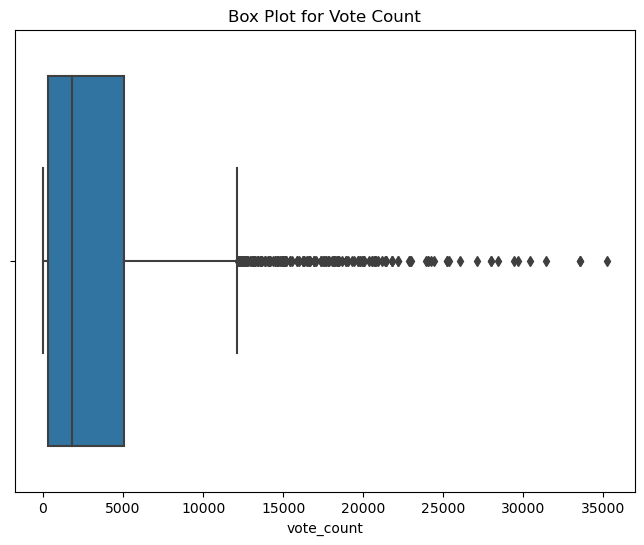

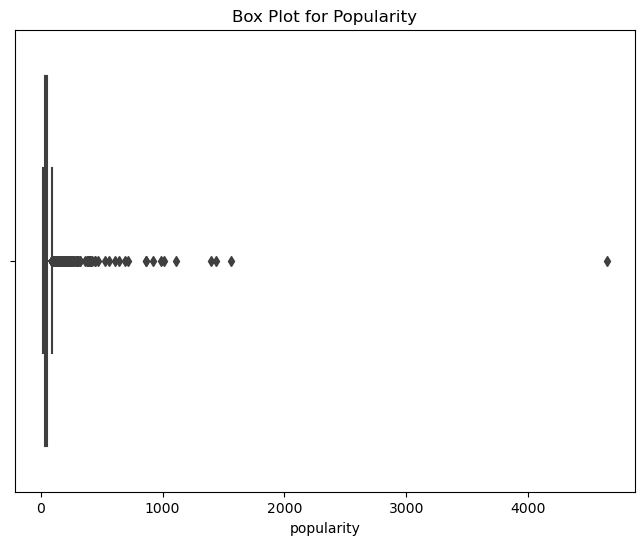

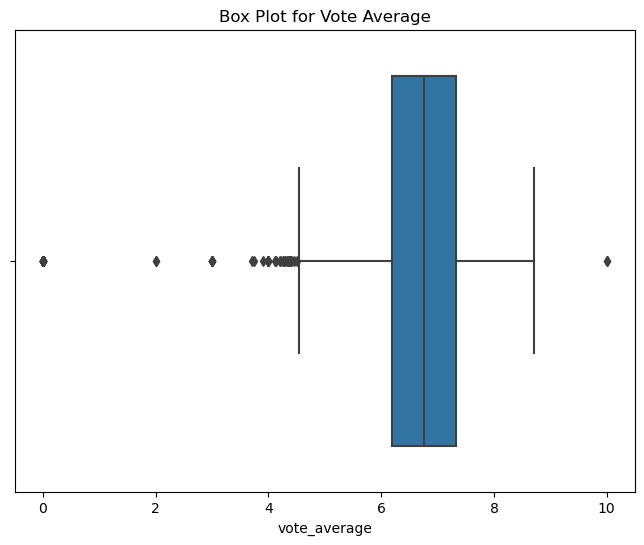

In [38]:
#box plot to check for outliers

# Box plot for vote_count
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['vote_count'])
plt.title('Box Plot for Vote Count')
plt.savefig('../images/boxplot_vote_count.png', bbox_inches='tight')


# Box plot for popularity
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['popularity'])
plt.title('Box Plot for Popularity')
plt.savefig('../images/boxplot_popularity.png', bbox_inches='tight')

plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb_df['vote_average'])
plt.title('Box Plot for Vote Average')
plt.savefig('../images/boxplot_vote_average.png', bbox_inches='tight')


The intution to keep outliers is based of the idea that popular movies tend to recieve higher number of votes. Removing popular movies based on vote count as outliers might not be appropriate for this recommender system as the goal of the analysis is to identify all type of movies that a users might like, rather than certain movies with a certain level of engagement. 

In [16]:
#checking duplicates in title column
title_duplicates = tmdb_df[tmdb_df.duplicated(subset='title', keep=False)]
title_duplicates

adult                     backdrop_path         genre_ids       id  \
17    False  /iKVkmyDKUHOS7r0fkF7sWLArCsv.jpg          [14, 27]   949567   
24    False  /iKVkmyDKUHOS7r0fkF7sWLArCsv.jpg          [14, 27]   949567   
50    False  /sfjqJDmNqMIImO5khiddb9TARvO.jpg         [878, 12]   438631   
77    False  /38Tiuonb8H0FqmR4WLcRCIfUVGV.jpg  [10751, 14, 878]   487047   
79    False  /tC78Pck2YCsUAtEdZwuHYUFYtOj.jpg      [28, 53, 80]   926393   
...     ...                               ...               ...      ...   
2983  False  /cyQK5IzMXDUS8o84HYbSIFQt1Vy.jpg     [28, 16, 878]    39102   
2986  False  /eNJhWy7xFzR74SYaSJHqJZuroDm.jpg         [878, 28]  1033219   
2987  False  /hXHJotZCTX4JQN080ZitJueR3H9.jpg    [9648, 27, 53]    10066   
2990  False  /h7AKqgIh86HDgJIzENeR2ng1Knn.jpg      [28, 12, 18]    20662   
2995  False  /1omLO5cfU8sYjm9xs9EwkyZkZ8l.jpg              [27]  1015936   

     original_language                    original_title  \
17                  en  The Exorcism of Hannah Stevenson   
24                  en  The Exorcism of Hannah Stevenson   
50                  en                              Dune   
77                  en                   A Witches' Ball   
79                  en                   The Equalizer 3   
...                ...                               ...   
2983                ja   ドラゴンボールゼット 超スーパーサイヤ人じんだ孫そん悟ご空くう   
2986                en                   Attack on Titan   
2987                en                      House of Wax   
2990                en                        Robin Hood   
2995                sv                              Feed   

                                               overview  popularity  \
17    Hannah and Matt, a young couple on their first...     398.757   
24    Hannah and Matt, a young couple on their first...     398.757   
50    Paul Atreides, a brilliant and gifted young ma...     248.686   
77    Every year the Witching World gathers to celeb...     188.136   
79    Robert McCall finds himself at home in Souther...     183.068   
...                                                 ...         ...   
2983  A Super Namekian named Slug comes to invade Ea...      28.669   
2986  As viable water is depleted on Earth, a missio...      28.636   
2987  A group of unwitting teens are stranded near a...      28.629   
2990  When soldier Robin happens upon the dying Robe...      28.622   
2995  A group of social media experts are hired to h...      28.609   

                           poster_path release_date  \
17    /so05qY0sDY0348bRg0tK9tSnnEq.jpg   2022-03-14   
24    /so05qY0sDY0348bRg0tK9tSnnEq.jpg   2022-03-14   
50    /d5NXSklXo0qyIYkgV94XAgMIckC.jpg   2021-09-15   
77    /70RiLlSIi5q17Ybnq61rUt8JVoU.jpg   2017-05-06   
79    /b0Ej6fnXAP8fK75hlyi2jKqdhHz.jpg   2023-08-30   
...                                ...          ...   
2983  /1lmwZTsqwTtvd3m60pyQfhGM2Ut.jpg   1991-03-19   
2986  /ay8SLFTMKzQ0i5ewOaGHz2bVuZL.jpg   2022-09-30   
2987  /aCLSgw1DaqkRvosYc3YUttBTtpT.jpg   2005-05-05   
2990  /9NS5QGOfck24yL3bZqWeW06PgPC.jpg   2010-05-12   
2995  /n600JTSccw03avtIb8pO6lwMllH.jpg   2022-10-28   

                                 title  video  vote_average  vote_count  
17    The Exorcism of Hannah Stevenson  False         6.333          15  
24    The Exorcism of Hannah Stevenson  False         6.333          15  
50                                Dune  False         7.784        9988  
77                     A Witches' Ball  False         6.288          59  
79                     The Equalizer 3  False         7.400        2201  
...                                ...    ...           ...         ...  
2983          Dragon Ball Z: Lord Slug  False         6.400         481  
2986                   Attack on Titan  False         6.018         167  
2987                      House of Wax  False         5.954        2836  
2990                        Robin Hood  False         6.391        4356  
2995                              Feed  Fals

In [17]:
#checking duplicates in overview column
overview_duplicates = tmdb_df[tmdb_df.duplicated(subset='overview', keep=False)]
overview_duplicates

adult                     backdrop_path         genre_ids       id  \
17    False  /iKVkmyDKUHOS7r0fkF7sWLArCsv.jpg          [14, 27]   949567   
24    False  /iKVkmyDKUHOS7r0fkF7sWLArCsv.jpg          [14, 27]   949567   
50    False  /sfjqJDmNqMIImO5khiddb9TARvO.jpg         [878, 12]   438631   
61    False  /j6HmtpElHPSkoRIGNlkcqC5aU9g.jpg              [80]   101251   
77    False  /38Tiuonb8H0FqmR4WLcRCIfUVGV.jpg  [10751, 14, 878]   487047   
...     ...                               ...               ...      ...   
2979  False  /ilwS3zaTa79L6Zz9N885TanHbzl.jpg       [35, 10749]    50124   
2981  False  /eVSa4TpyXbOdk9fXSD6OcORJGtv.jpg    [27, 9648, 53]   803114   
2983  False  /cyQK5IzMXDUS8o84HYbSIFQt1Vy.jpg     [28, 16, 878]    39102   
2987  False  /hXHJotZCTX4JQN080ZitJueR3H9.jpg    [9648, 27, 53]    10066   
2995  False  /1omLO5cfU8sYjm9xs9EwkyZkZ8l.jpg              [27]  1015936   

     original_language                    original_title  \
17                  en  The Exorcism of Hannah Stevenson   
24                  en  The Exorcism of Hannah Stevenson   
50                  en                              Dune   
61                  en   El Padrino II: Border Intrusion   
77                  en                   A Witches' Ball   
...                ...                               ...   
2979                it                           Monella   
2981                en                        The Requin   
2983                ja   ドラゴンボールゼット 超スーパーサイヤ人じんだ孫そん悟ご空くう   
2987                en                      House of Wax   
2995                sv                              Feed   

                                               overview  popularity  \
17    Hannah and Matt, a young couple on their first...     398.757   
24    Hannah and Matt, a young couple on their first...     398.757   
50    Paul Atreides, a brilliant and gifted young ma...     248.686   
61                                                          216.953   
77    Every year the Witching World gathers to celeb...     188.136   
...                                                 ...         ...   
2979  The story takes place in northern Italy in the...      28.717   
2981  A couple on a romantic getaway find themselves...      28.679   
2983  A Super Namekian named Slug comes to invade Ea...      28.669   
2987  A group of unwitting teens are stranded near a...      28.629   
2995  A group of social media experts are hired to h...      28.609   

                           poster_path release_date  \
17    /so05qY0sDY0348bRg0tK9tSnnEq.jpg   2022-03-14   
24    /so05qY0sDY0348bRg0tK9tSnnEq.jpg   2022-03-14   
50    /d5NXSklXo0qyIYkgV94XAgMIckC.jpg   2021-09-15   
61    /yHtPjWgO3wCnY21qKL3NjbBbthx.jpg   2008-01-01   
77    /70RiLlSIi5q17Ybnq61rUt8JVoU.jpg   2017-05-06   
...                                ...          ...   
2979  /n691GdFEMP3bBZ3SvLxFD2paAOz.jpg   1998-06-01   
2981  /i0z8g2VRZP3dhVvvSMilbOZMKqR.jpg   2022-01-28   
2983  /1lmwZTsqwTtvd3m60pyQfhGM2Ut.jpg   1991-03-19   
2987  /aCLSgw1DaqkRvosYc3YUttBTtpT.jpg   2005-05-05   
2995  /n600JTSccw03avtIb8pO6lwMllH.jpg   2022-10-28   

                                 title  video  vote_average  vote_count  
17    The Exorcism of Hannah Stevenson  False         6.333          15  
24    The Exorcism of Hannah Stevenson  False         6.333          15  
50                                Dune  False         7.784        9988  
61     El Padrino II: Border Intrusion  False         6.250           4  
77                     A Witches' Ball  False         6.288          59  
...                                ...    ...           ...         ...  
2979                    Frivolous Lola  False         5.000         197  
2981                        The Requin  False         4.915         312  
2983          Dragon Ball Z: Lord Slug  False         6.400         481  
2987                      House of Wax  False         5.954        2836  
2995                              Feed  Fals

The duplicates found in overview and title is related to having nothing filled out in it columns, having different production year (but same name) or having same title and overview, but different feature (e.g., korean version, vote average, etc.) As a result the duplicates are not genuinely redundant and they are worth keep as they provide additional information.

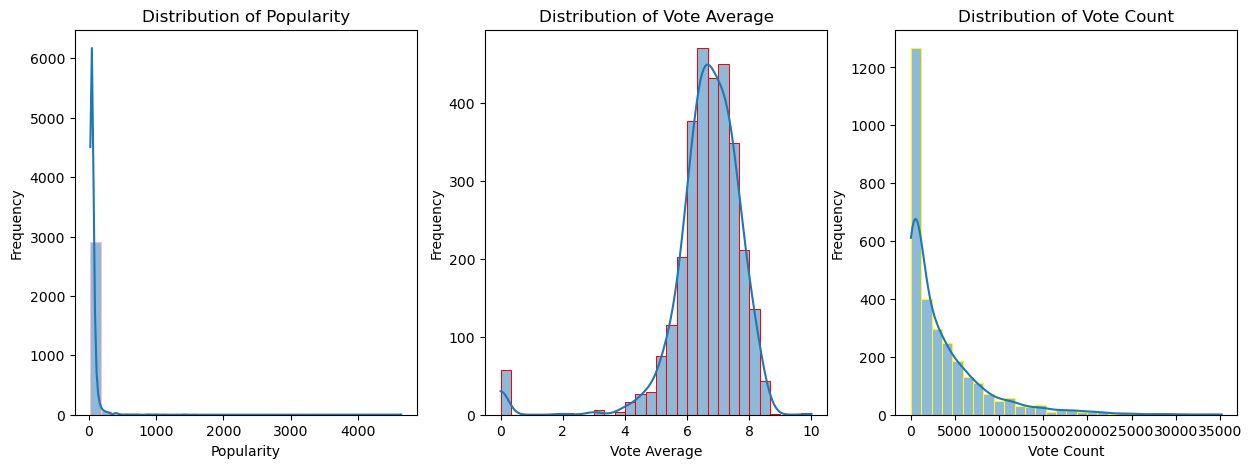

In [36]:
# #check distribution to see if the distribution is already well-behaved 
# #and within a reasonable range

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Histograms with KDE for 'popularity', 'vote_average', and 'vote_count'
sns.histplot(tmdb_df['popularity'], bins=30, kde=True, edgecolor='pink', ax=axes[0])
axes[0].set_title('Distribution of Popularity')
axes[0].set_xlabel('Popularity')
axes[0].set_ylabel('Frequency')

sns.histplot(tmdb_df['vote_average'], bins=30, kde=True, edgecolor='red', ax=axes[1])
axes[1].set_title('Distribution of Vote Average')
axes[1].set_xlabel('Vote Average')
axes[1].set_ylabel('Frequency')

sns.histplot(tmdb_df['vote_count'], bins=30, kde=True, edgecolor='yellow', ax=axes[2])
axes[2].set_title('Distribution of Vote Count')
axes[2].set_xlabel('Vote Count')
axes[2].set_ylabel('Frequency')

plt.savefig('../images/distribution.png', bbox_inches='tight')



In [19]:
#Normalize numerical features for better model performance
scaler = MinMaxScaler()

tmdb_df['popularity_normalized'] = scaler.fit_transform(tmdb_df[['popularity']])


tmdb_df['vote_count_normalized'] = scaler.fit_transform(tmdb_df[['vote_count']])

**Interpretation**

Normalization was implemented because of the wide range and variability in popularity and vote count (minimum popularity is 18.09 and maximum is 4578.60 | the minimum vote count is 0, and the maximum is 35205 which indicates large range of values).

The distribution of popularity and vote count is right skewed, which in the case of popularity, it suggests that there are a few movies that are extremely popular. While in the case of vote_count, it suggests that there are a few movies with exceptionally high vote counts. The distribution of vote averages is left skewed, which indicates that there might be a concentration of movies with higher ratings 

**Visualize Genre**

In [20]:
#Explore the genres
genre_counts = tmdb_df['genre_ids'].explode().value_counts()
genre_counts

genre_ids
28       1123
18        955
35        838
12        824
53        796
14        520
878       506
16        503
10751     484
27        456
80        382
10749     371
9648      251
36         92
10752      88
10402      43
37         35
10770      31
99         24
Name: count, dtype: int64

In [21]:
#https://developer.themoviedb.org/reference/genre-movie-list
#map genre IDS to names 
genre_mapping = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}

In [22]:
#map genre IDS to name in the Dataframe
tmdb_df['genre_names'] = tmdb_df['genre_ids'].apply(lambda ids: [genre_mapping[id] for id in ids])

In [23]:
#after mapping
genre_counts2 = tmdb_df['genre_names'].explode().value_counts()
genre_counts2

genre_names
Action             1123
Drama               955
Comedy              838
Adventure           824
Thriller            796
Fantasy             520
Science Fiction     506
Animation           503
Family              484
Horror              456
Crime               382
Romance             371
Mystery             251
History              92
War                  88
Music                43
Western              35
TV Movie             31
Documentary          24
Name: count, dtype: int64

In [120]:
genre_counts2

genre_names
Action             1123
Drama               955
Comedy              838
Adventure           824
Thriller            796
Fantasy             520
Science Fiction     506
Animation           503
Family              484
Horror              456
Crime               382
Romance             371
Mystery             251
History              92
War                  88
Music                43
Western              35
TV Movie             31
Documentary          24
Name: count, dtype: int64

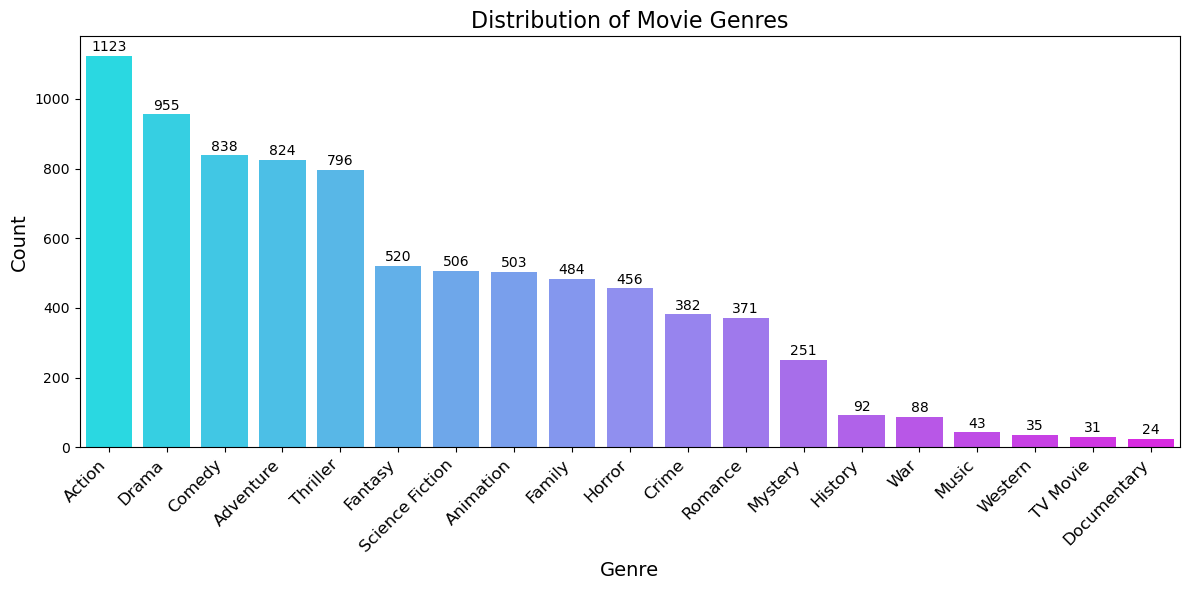

In [69]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=genre_counts2.index, y=genre_counts2.values, palette='cool')
plt.title('Distribution of Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

for index, value in enumerate(genre_counts2.values):
    bar_plot.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../images/dist_movie_genre.png', bbox_inches='tight')


The chart provides an overview of the frequency of different genres in the dataset. Action emerges as the most prevalent genre, with a count of 1123. Following action, drama, comedy, adventure, and thriller are among the top genres, illustrating their popularity and frequent occurrence in the dataset. 

**Visualize Release Year**

In [25]:
#create new column that shows the release year
tmdb_df['release_year'] = pd.to_datetime(tmdb_df['release_date']).dt.year


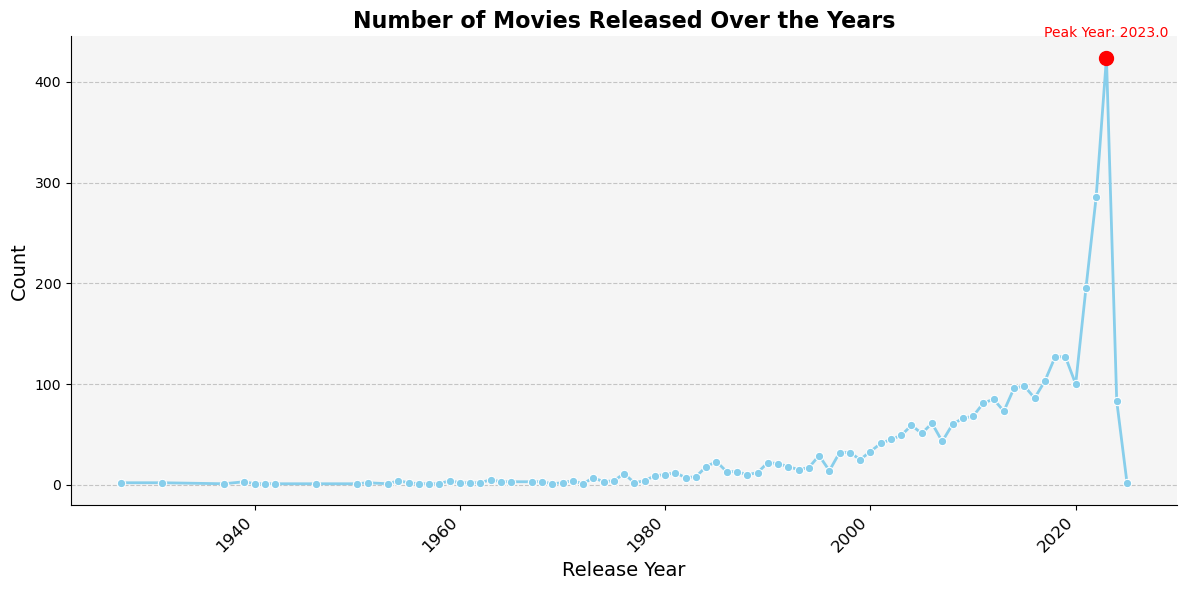

In [40]:
# Explore release years
release_year_counts = tmdb_df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x=release_year_counts.index, y=release_year_counts.values,
                         marker='o', color='skyblue', linewidth=2)
#highlight the peak year with red mark
peak_year = release_year_counts.idxmax()
plt.scatter(peak_year, release_year_counts.max(), color='red', s=100, zorder=5)

#annotate the peak year
plt.text(peak_year, release_year_counts.max() + 20, f'Peak Year: {peak_year}', 
         color='red', ha='center', fontsize=10)
plt.title('Number of Movies Released Over the Years', fontsize=16, weight='bold')
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

#background customization
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.savefig('../images/movies_release_year.png', bbox_inches='tight')




The line plot provides a temporal exploration of movie releases within the dataset. The chart offers insights into the temporal distribution of movies, spanning from 1900 to 2026. The red marker highlights the peak year with the highest number of movie releases. In this case, 2023 stands out as the year with the maximum movie releases, with a count of 424. As such, the dataset has a lot of movies for that particular year followed by 2022, 2021, and 2018.

In [27]:
release_year_counts.sort_values(ascending=False)

release_year
2023.0    424
2022.0    286
2021.0    195
2019.0    127
2018.0    127
         ... 
1942.0      1
1941.0      1
1940.0      1
1937.0      1
1956.0      1
Name: count, Length: 82, dtype: int64

**Relationship between Popularity, Genre, User Rating and Vote Count**

In [45]:
#make a string column for genre name to be able to visualize it bc unhasable type error
tmdb_df['genre_ids_str'] = tmdb_df['genre_names'].astype(str)

In [100]:
#bc of large number of unique genre and title type, minimized the ones selected

#most frequent occuring
top_genres = tmdb_df['genre_ids_str'].value_counts().head(40).index
#highest average genre by popularity
top_genres2 = tmdb_df.groupby('genre_ids_str')['popularity'].mean().nlargest(40).index
# selecting the top 40 titles with highest populaity average
top_titles = tmdb_df.nlargest(40, 'popularity')


# selecting the top 40 movies based on user rating
top_user_titles = tmdb_df.nlargest(40, 'vote_average')
# Chighest average genre by user ratings
highest_user_genres = tmdb_df.groupby('genre_ids_str')['vote_average'].mean().nlargest(40)


/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_38451/727827252.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='popularity', data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres2)], ci=None, palette='Blues_d')


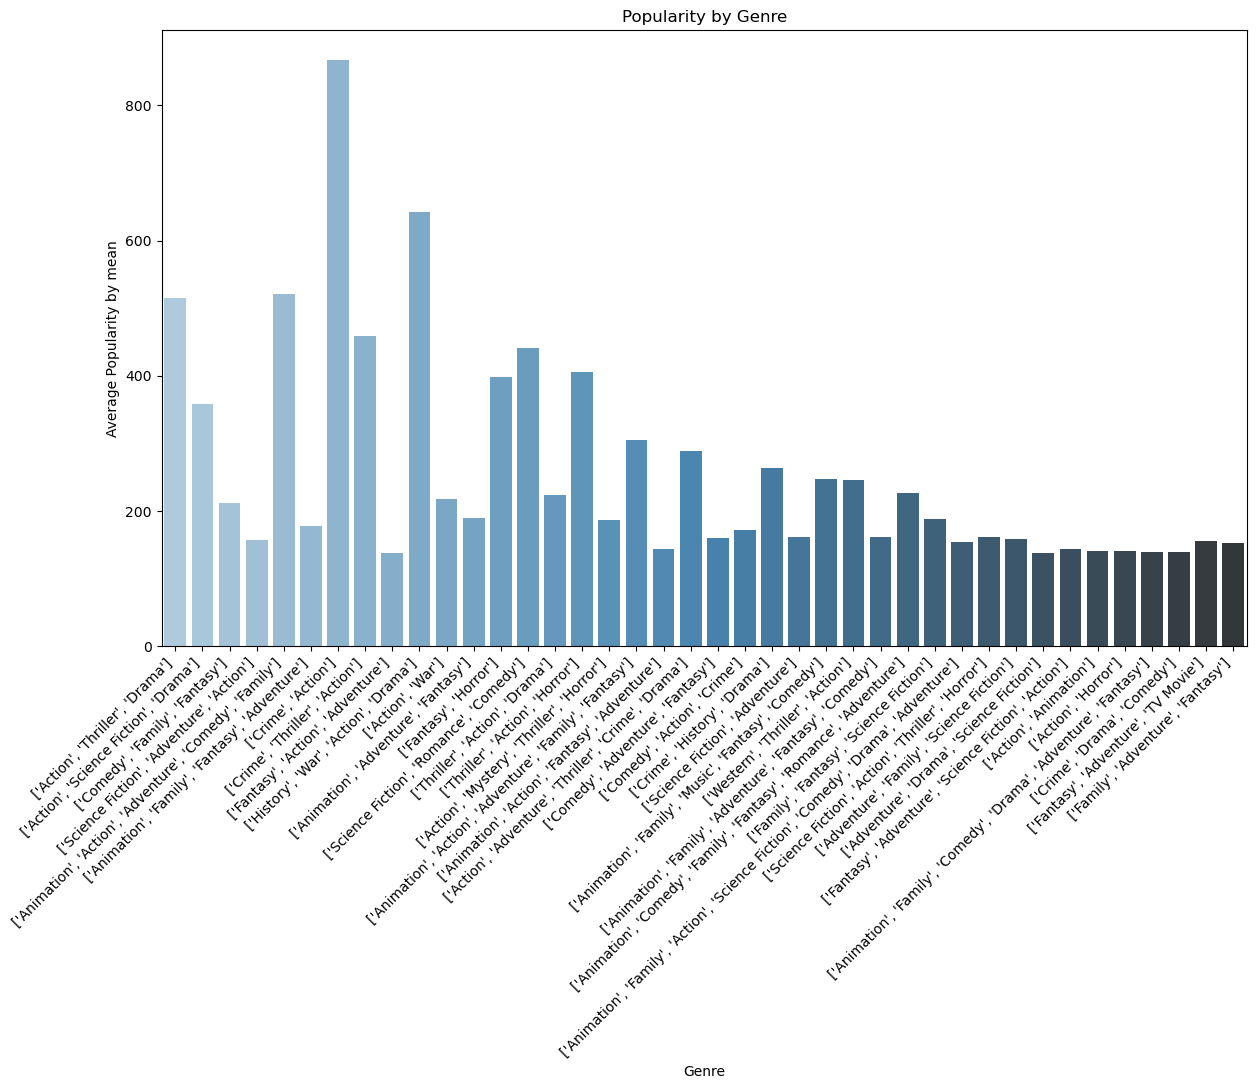

In [87]:
#genres with the highest average popularity, 
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='popularity', 
            data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres2)], ci=None, palette='Blues_d')
plt.title('Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity by mean')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40popular_movies_genre.png', bbox_inches='tight')

The chart showcases the top genres with the highest average popularity in descending order. The x-axis indicates the unique genre combination and the y-axis represents the average popularity.The genre with the highest average popularity is Crime and Action, followed by History, war, action, and drama.

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_38451/3472842553.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  top_titles_plot = sns.barplot(x='title', y='popularity', data=top_titles, ci=None, palette='plasma')


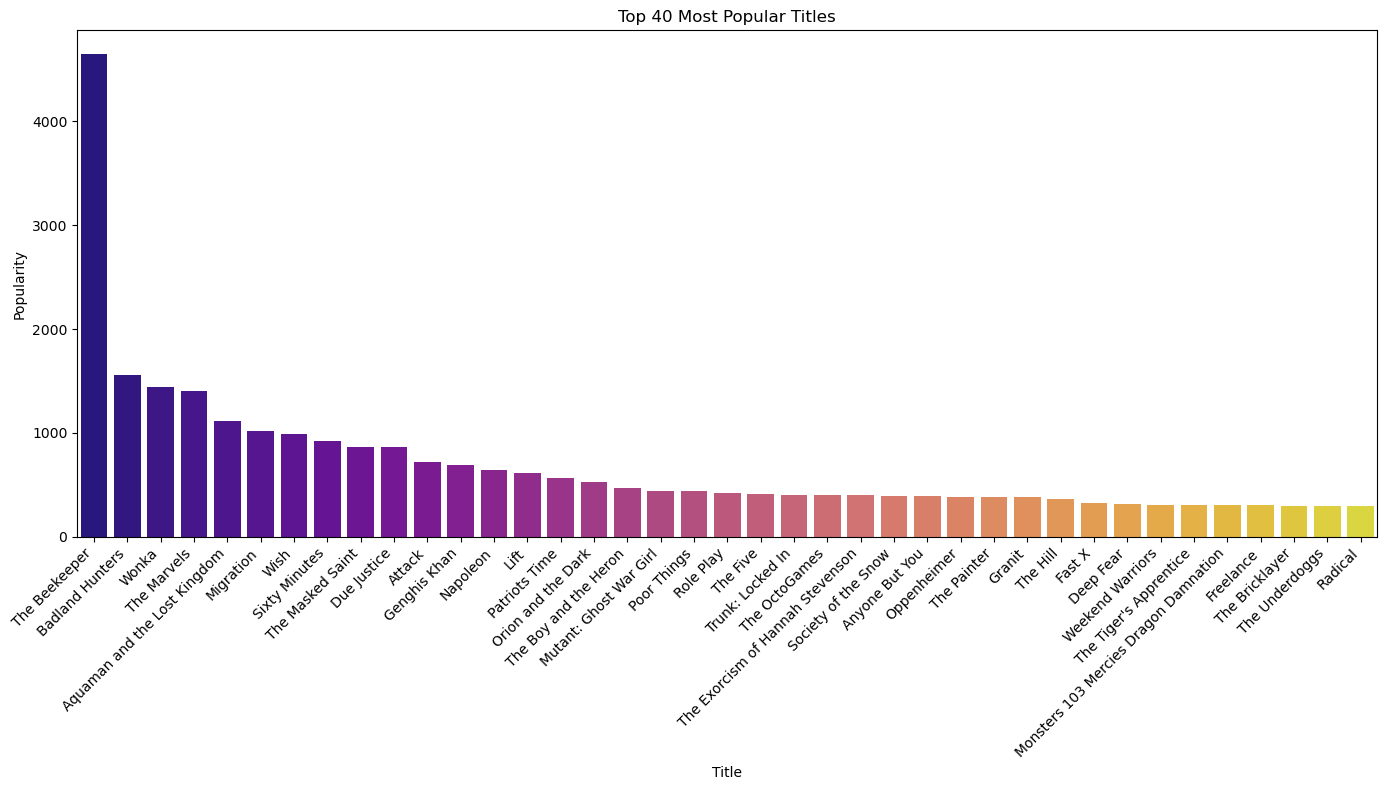

In [90]:
# Visualize the top 40 most popular titles
plt.figure(figsize=(14, 8))
top_titles_plot = sns.barplot(x='title', y='popularity', 
                              data=top_titles, ci=None, palette='plasma')
top_titles_plot.set_xticklabels(top_titles_plot.get_xticklabels(), rotation=45, ha='right') 
plt.title('Top 40 Most Popular Titles')
plt.xlabel('Title')
plt.ylabel('Popularity')
plt.tight_layout()
plt.savefig('../images/top_40_popular_titles.png', bbox_inches='tight')






The chart displays the popularity of the top 40 movie titles based on the 'popularity' column. The Beekeeper is the most popular title, as it has the highest bar on the chart, followed by Badland hunters. The chart showcases a diverse range of movie titles not only from america, but from other countries like korea(badland hunter), japan(The Boy and the Heron), russia(Time of Patriots), Latin America(The Society of Snow) and China (Mutant: Ghost Warrior).

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_38451/4161067152.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='popularity', data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)], ci=None, palette='muted')


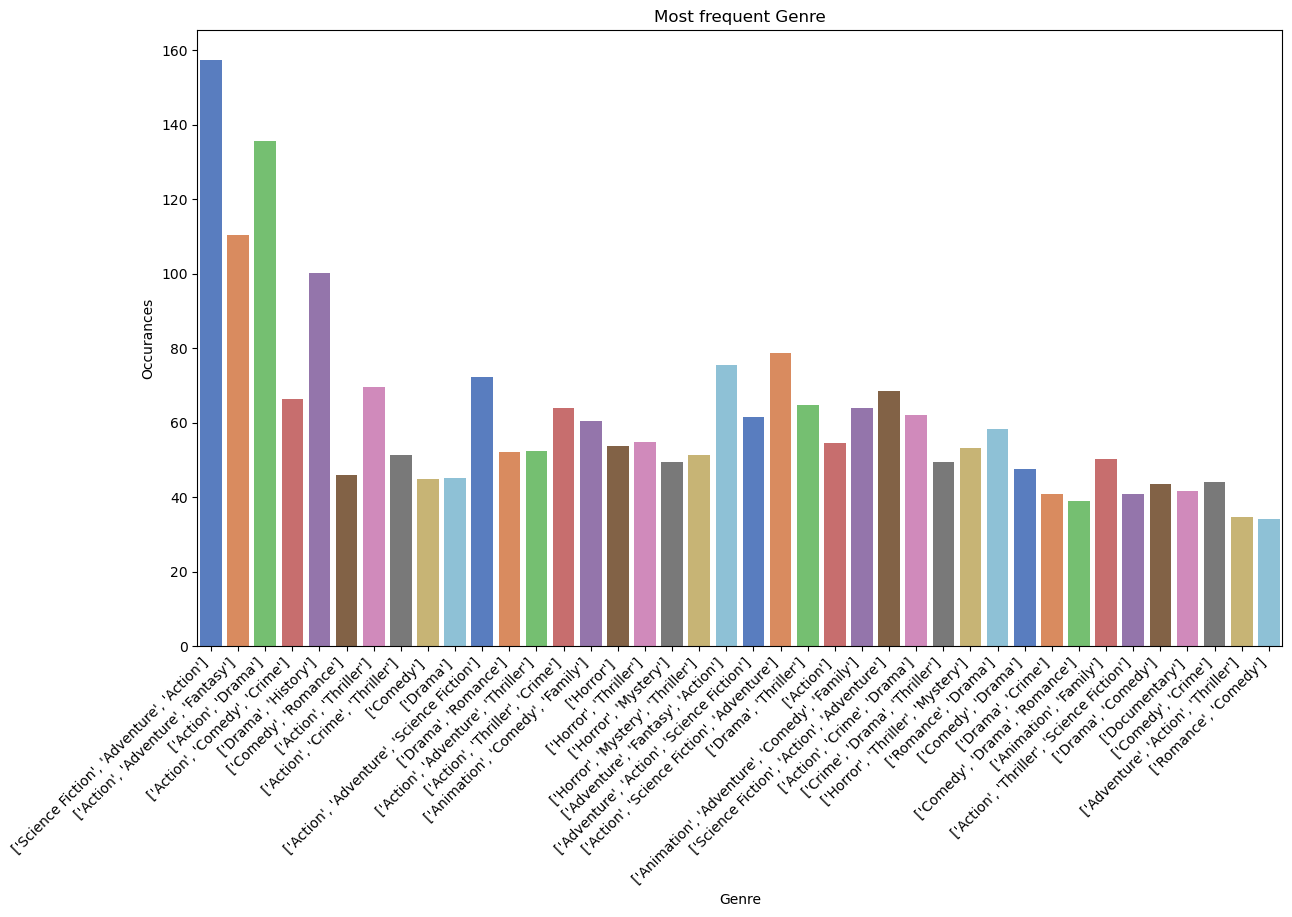

In [89]:
#visualize the top 40 most frequently occurring genres
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='popularity', 
            data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)], ci=None, palette='muted')
plt.title('Most frequent Genre')
plt.xlabel('Genre')
plt.ylabel('Occurances')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40mostfrequent_genre.png', bbox_inches='tight')



The chart visualizes the frequency of occurrence for each genre among the top 40 movies

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_38451/219698947.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='title', y='vote_average',


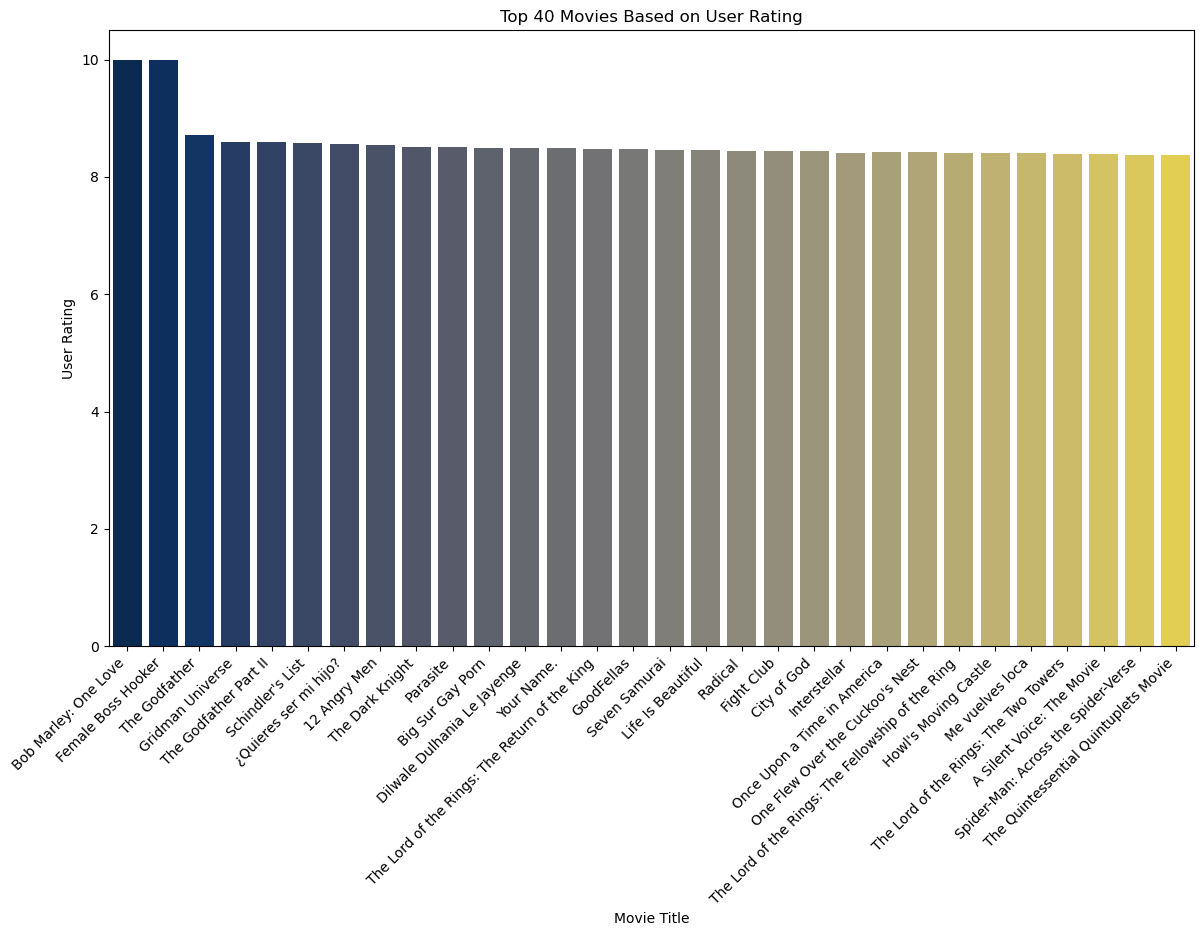

In [94]:
#top movies based on user rating
plt.figure(figsize=(14, 8))
sns.barplot(x='title', y='vote_average', 
            data=top_user_titles, ci=None, palette='cividis')
plt.title('Top 40 Movies Based on User Rating')
plt.xlabel('Movie Title')
plt.ylabel('User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/top40_user_rated_movies.png', bbox_inches='tight')

The barplot visualizes the average user ratings for the top 40 movies.Bob Marley: One Love and the korean film, the Female Boss Hooker have perfect 10 scores when it comes to user rating.

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_38451/1177455134.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genre_ids_str', y='vote_average', data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)],


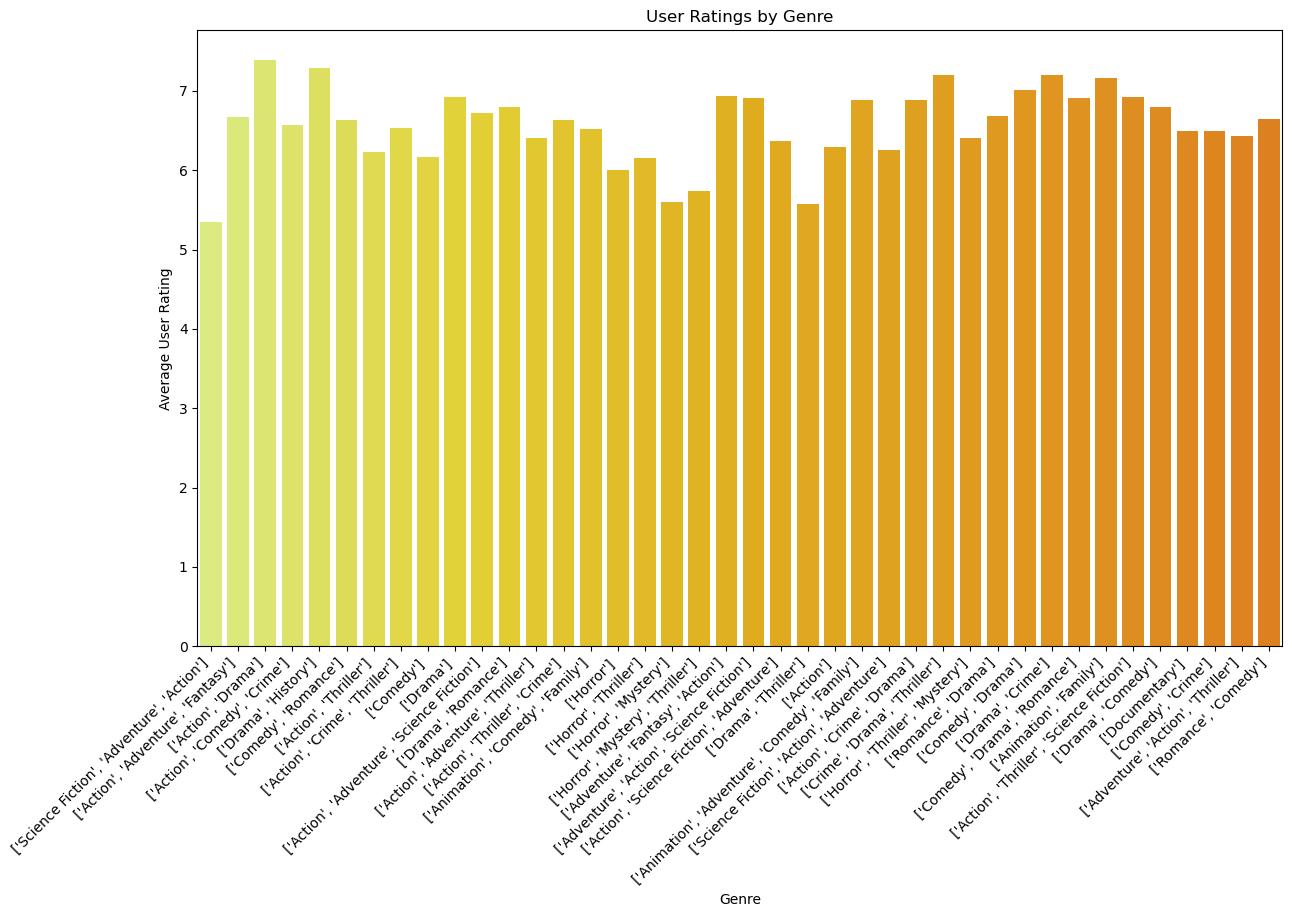

In [74]:
#visualize the top 40  most frequent genre based on user rating
plt.figure(figsize=(14, 8))
sns.barplot(x='genre_ids_str', y='vote_average', data=tmdb_df[tmdb_df['genre_ids_str'].isin(top_genres)], 
            ci=None, palette='Wistia')
plt.title('User Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/40movies_genre_byuser.png', bbox_inches='tight')


This chart shows the average user ratings for the top 40 movies, grouped by genre. 

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_38451/2174560119.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=highest_user_genres.index,


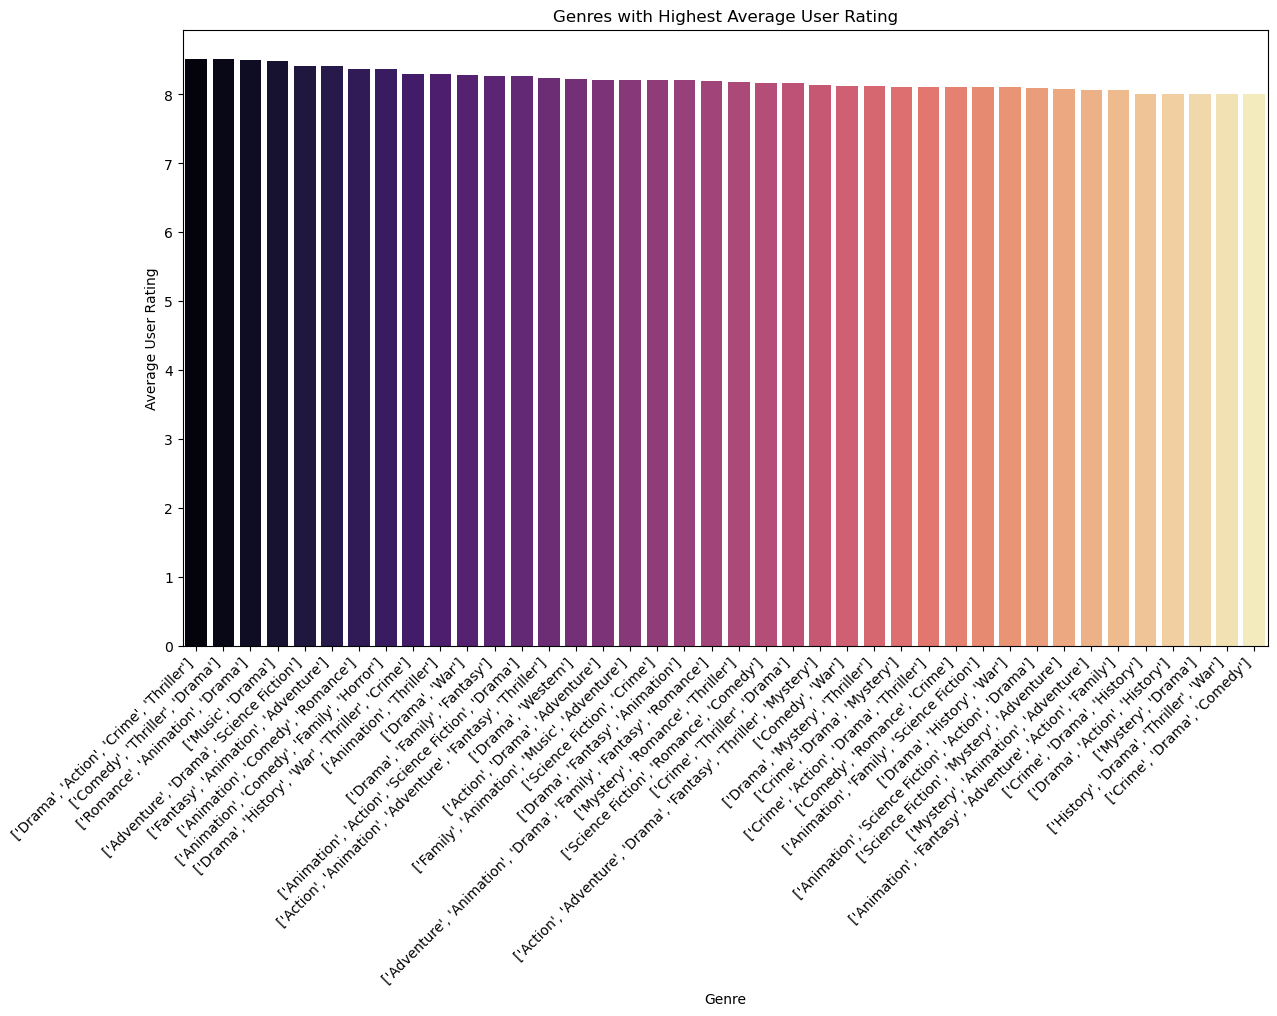

In [101]:
plt.figure(figsize=(14, 8))
sns.barplot(x=highest_user_genres.index, 
            y=highest_user_genres.values, ci=None, palette='magma')
plt.title('Genres with Highest Average User Rating')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/highest_avg_user_rated_genres.png', bbox_inches='tight')

The chart visulizes movie genres that consistently receive high user ratings. The combination of 'Drama', 'Action', 'Crime', and 'Thriller' genres tops the list with an impressive average rating of 8.515. Comedy combined with thriller and drama follows closely with an average rating of 8.512.

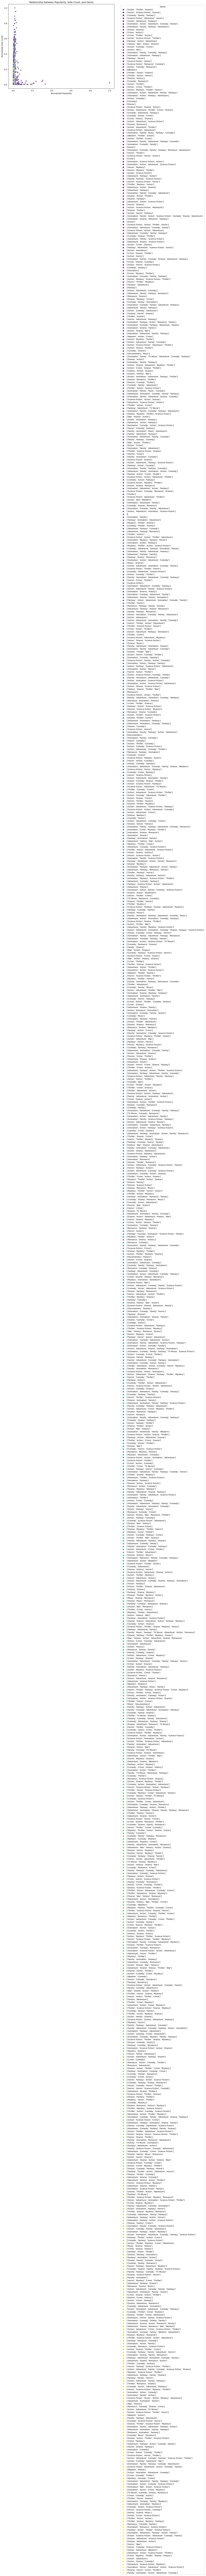

In [48]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='popularity_normalized', y='vote_count_normalized', 
                data=tmdb_df, hue='genre_ids_str', palette='viridis', alpha=0.7)
plt.title('Relationship between Popularity, Vote Count, and Genre')
plt.xlabel('Normalized Popularity')
plt.ylabel('Normalized Vote Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')



The scatter plot visually represents the relationship between normalized popularity, normalized vote count, and movie genres. Each point on the plot corresponds to a movie in the dataset (the one at 1.0 is more than likely the Beekeper), and the position of the point is determined by its normalized popularity on the x-axis and normalized vote count on the y-axis. The movies based on normalized popularity are concentrated around the range of 0.0 to 0.1 on the x-axis. Similarly, normalized vote counts are clustered around the range of 0.0 to 0.7 on the y-axis.


In [137]:
# Save the DataFrame to a CSV file
tmdb_df.to_csv('../data/tmdb_data.csv', index=False)
